## MNIST 손글씨 숫자 인식

In [1]:
import keras
keras.__version__

'3.10.0'

### MNIST데이터셋 가져오기

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### 탐색적 데이터 분석(EDA)



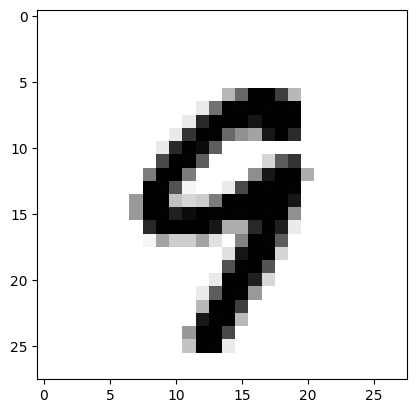

이미지의 클래스: 9


In [3]:
# train_images를 직접 matplotlib으로 그려서 이미지를 확인
# train_labels로 이미지의 클래스를 확인
import matplotlib.pyplot as plt
import random

# 랜덤으로 이미지 인덱스 선택
random_index = random.randint(0, len(train_images) - 1)

plt.imshow(train_images[random_index], cmap=plt.cm.binary)
plt.show()
print(f"이미지의 클래스: {train_labels[random_index]}")

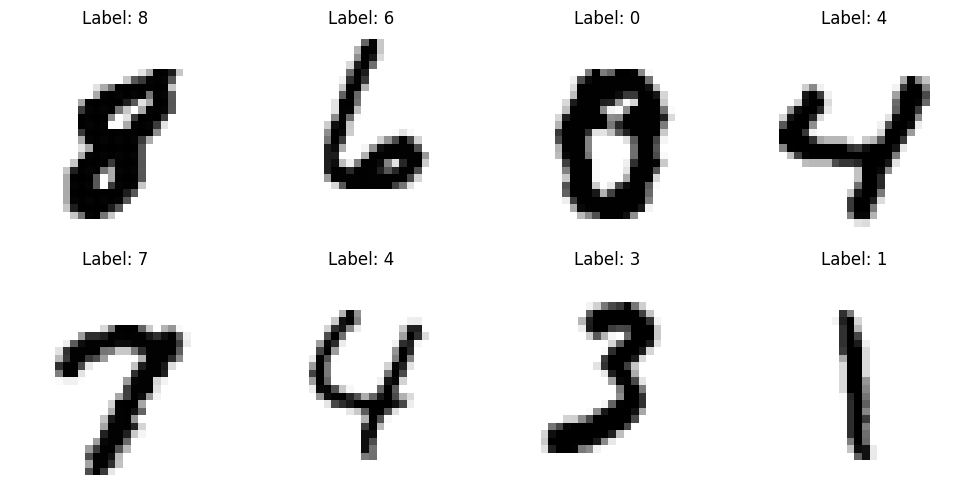

In [4]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(10, 5))
for i in range(8):
    random_index = random.randint(0, len(train_images) - 1)
    plt.subplot(2, 4, i + 1)  # 2행 4열, i+1번째 서브플롯
    plt.imshow(train_images[random_index], cmap=plt.cm.binary)
    plt.title(f'Label: {train_labels[random_index]}')
    plt.axis('off') # 축 정보 숨기기
plt.tight_layout() # 서브플롯 간 간격 자동 조절
plt.show()

In [5]:
# 데이터의 갯수 확인
len(train_images), len(train_labels)

(60000, 60000)

In [6]:
# 훈련용 이미지, 레이블 데이터의 shape을 확인
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
# 테스트용 이미지, 레이블 데이터의 shape을 확인
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [8]:
# 0~255사이의 정수값으로 구성되어 있다. 현재 3차원 데이터
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

### 데이터 전처리

#### reshape, 정규화(Normalize, 0\~255 사이의 숫자를 0~1 사이의 숫자로 변환),  
#### labels(10진수) -> one-hot encoding

In [9]:
#reshape (NN에 입력하기 위해 3차원을 2차원으로 변환)
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

In [10]:
train_images.shape, test_images.shape

((60000, 784), (10000, 784))

In [11]:
train_images[0][0]

np.uint8(0)

In [12]:
# Normalize
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [13]:
train_images[0][0]

np.float32(0.0)

In [14]:
train_labels[0]

np.uint8(5)

In [15]:
# one-hot encoding변환
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

### mnist를 keras로 모델링

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
import numpy as np

# 신경망을 쌓아올리는 방식
# 앞에 레이어의 출력이 자동으로 다음 레이어의 입력으로 연결된다.
model = Sequential()

# 입력층(Input)을 정의
# (28,28)이 아니라 (28*28,)인 이유: 2차원을 1차원으로 변환, 튜플임을 명시적으로 나타내기 위해 콤마 붙임(keras의 Input 레이어는 shape인자로 튜플을 기대함)
model.add(Input(shape=(28*28,)))

# 은닉층(Hidden)을 정의
# 히든 레이어의 수는 3개, 노드는 각각 256, 128, 64
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))

# 출력층(Output)을 정의
# 10은 분류 클래스의 갯수
# activation을 softmax로 사용
# 다중 분류 모델의 출력값이 Logit(숫자)이 나오는데
# Logit을 확률로 변환해주는 함수 softmax
model.add(Dense(10, activation='softmax'))

# 모델을 컴파일

# 256,128 -> param : 235,146
# 512,256 -> param : 535,818
# 512,256,64 -> param : 550,346
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 550,346 (2.10 MB)

 Trainable params: 550,346 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

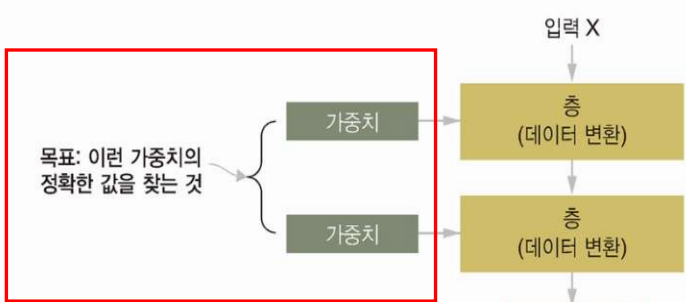

### 모델을 설정(compile)

In [18]:
# loss함수, optimizer함수, metrics(평가지표)를 정의, 설정
# 일반적으로 분류 모델에서는 loss, metrics를 사용
# 회귀 모델에서는 loss만 사용하는 경우도 많다.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

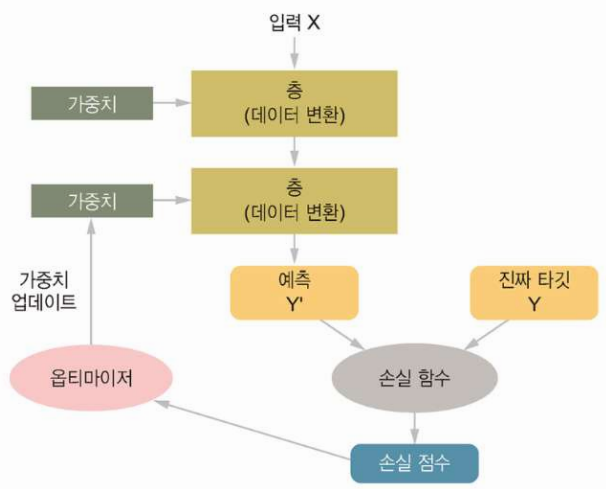

### 모델을 학습

In [19]:
# batch_size를 256으로 설정하면 한 epoch당 235걸음을 이동
# 10 epoch시에 2350걸음 이동
history = model.fit(train_images, train_labels, epochs=10, batch_size=256)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.8342 - loss: 0.5551
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9686 - loss: 0.1034
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9804 - loss: 0.0636
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9870 - loss: 0.0421
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9913 - loss: 0.0287
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9926 - loss: 0.0237
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9949 - loss: 0.0169
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9961 - loss: 0.0141
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9956 - loss: 0.0136
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9977 - loss: 0.0077


In [20]:
history.history

{'accuracy': [0.9153666496276855,
  0.9701333045959473,
  0.9809666872024536,
  0.9866499900817871,
  0.9910500049591064,
  0.9921166896820068,
  0.9944333434104919,
  0.9951333403587341,
  0.9957833290100098,
  0.9968000054359436],
 'loss': [0.28798216581344604,
  0.09850863367319107,
  0.06267240643501282,
  0.04219498857855797,
  0.029221374541521072,
  0.024295378476381302,
  0.017758922651410103,
  0.015402749180793762,
  0.012271634303033352,
  0.009851677343249321]}

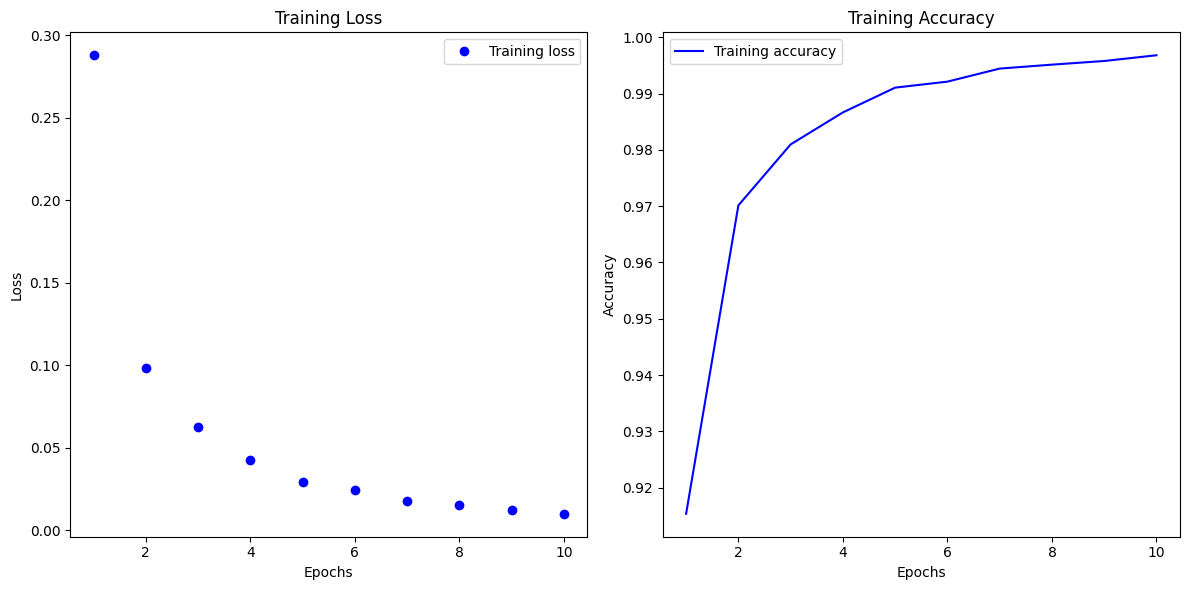

In [21]:
# history.history를 사용하여 그래프를 그린다.
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
accuracy_values = history_dict['accuracy']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))

# Loss 그래프
plt.subplot(1, 2, 1) # 1행 2열 중 첫 번째
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2) # 1행 2열 중 두 번째
plt.plot(epochs, accuracy_values, 'b', label='Training accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
# test_images, test_labels를 사용하여 이미지의 클래스를 예측

loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9750 - loss: 0.0806
Test Loss: 0.0705
Test Accuracy: 0.9793
